In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [15]:
import os

print(os.listdir("/kaggle/input"))



['time-series', 'melbourne-daily-min-temperatures-eda']


In [16]:
import os
print(os.listdir("/kaggle/input/time-series"))


['daily-minimum-temperatures-in-me.csv']


In [18]:
with open("/kaggle/input/time-series/daily-minimum-temperatures-in-me.csv", "r") as f:
    for i in range(20):
        print(f.readline())


"Date","Daily minimum temperatures in Melbourne, Australia, 1981-1990"

"1981-01-01",20.7

"1981-01-02",17.9

"1981-01-03",18.8

"1981-01-04",14.6

"1981-01-05",15.8

"1981-01-06",15.8

"1981-01-07",15.8

"1981-01-08",17.4

"1981-01-09",21.8

"1981-01-10",20.0

"1981-01-11",16.2

"1981-01-12",13.3

"1981-01-13",16.7

"1981-01-14",21.5

"1981-01-15",25.0

"1981-01-16",20.7

"1981-01-17",20.6

"1981-01-18",24.8

"1981-01-19",17.7



In [24]:
import pandas as pd

data = pd.read_csv(
    "/kaggle/input/time-series/daily-minimum-temperatures-in-me.csv",
    header=0,
    quotechar='"',
    on_bad_lines='skip'     # skip bad/extra-column rows
)


In [25]:
data.columns = ["Date", "Temp"]
data["Date"] = pd.to_datetime(data["Date"])


Plot Time Series

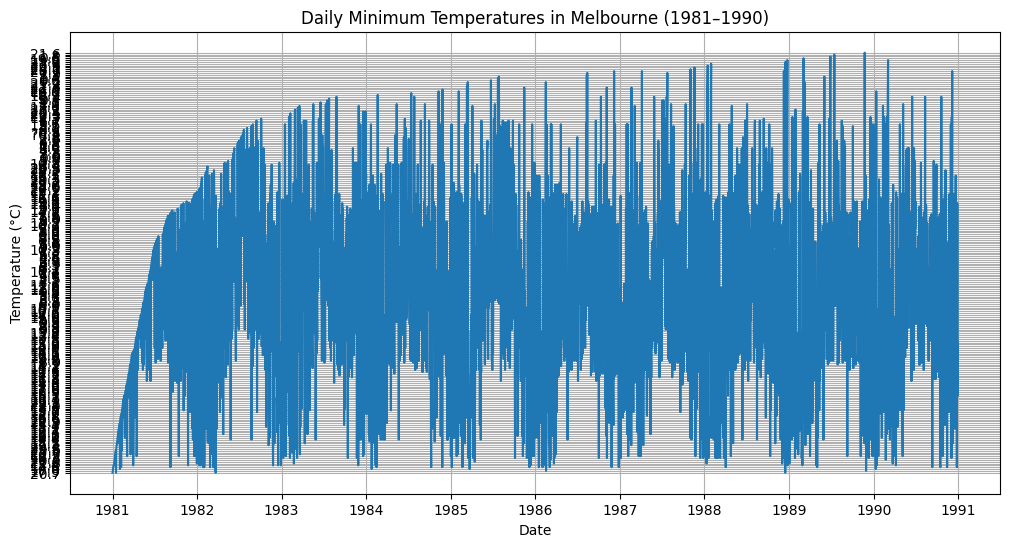

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(data["Date"], data["Temp"])
plt.title("Daily Minimum Temperatures in Melbourne (1981–1990)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()


Check Stationarity (ADF Test)

Before Differencing - p-value: 0.0002472372465853515
After Differencing - p-value: 0.0


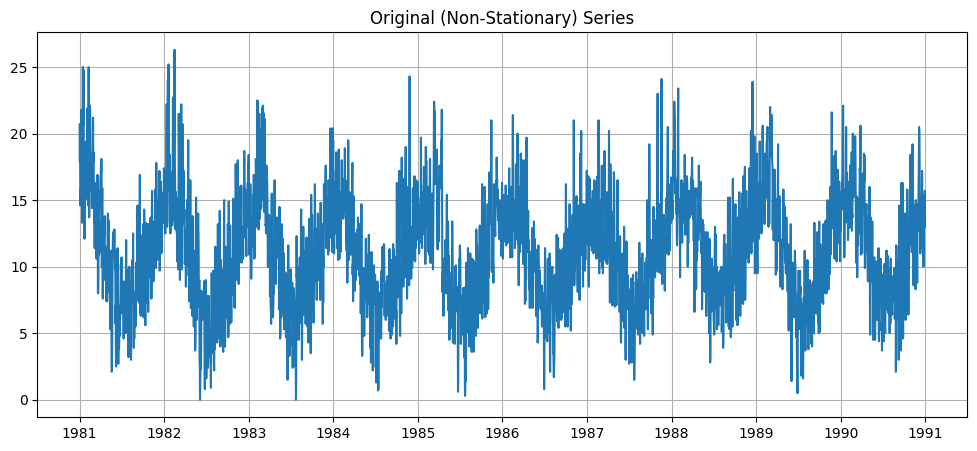

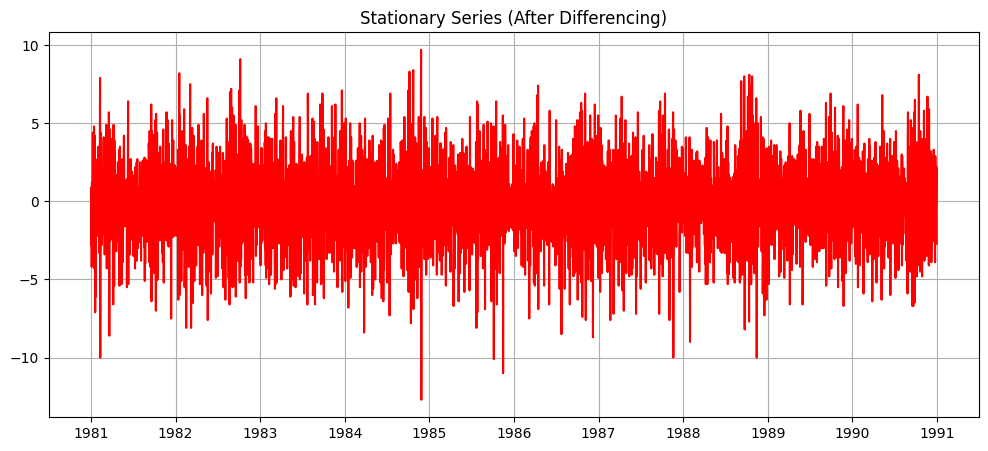

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

data = pd.read_csv("/kaggle/input/time-series/daily-minimum-temperatures-in-me.csv", on_bad_lines='skip')
data.columns = ["Date", "Temp"]
data["Date"] = pd.to_datetime(data["Date"])
data["Temp"] = pd.to_numeric(data["Temp"], errors="coerce")
data = data.dropna()


result_before = adfuller(data["Temp"])
print("Before Differencing - p-value:", result_before[1])

data["Temp_diff"] = data["Temp"].diff()
data_stationary = data.dropna()

result_after = adfuller(data_stationary["Temp_diff"])
print("After Differencing - p-value:", result_after[1])

plt.figure(figsize=(12,5))
plt.plot(data["Date"], data["Temp"], label="Original")
plt.title("Original (Non-Stationary) Series")
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(data_stationary["Date"], data_stationary["Temp_diff"], label="After Differencing", color='red')
plt.title("Stationary Series (After Differencing)")
plt.grid(True)
plt.show()


Plot ACF & PACF

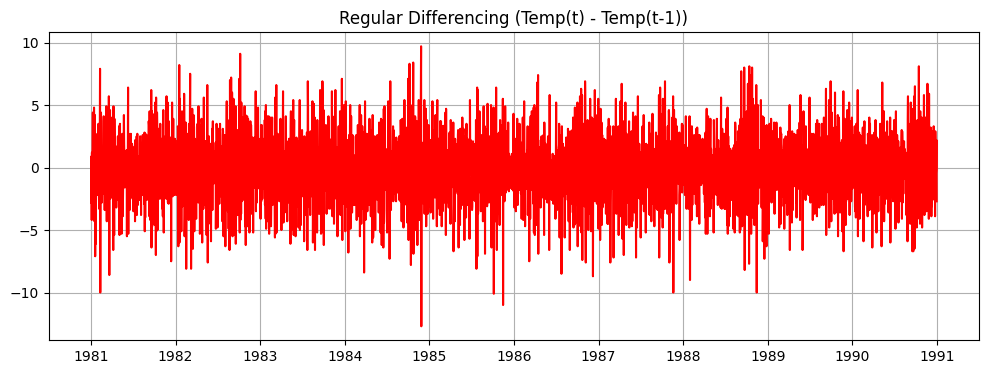

In [3]:
data["regular_diff"] = data["Temp"].diff()
regular_diff = data.dropna()

plt.figure(figsize=(12,4))
plt.plot(regular_diff["Date"], regular_diff["regular_diff"], color='red')
plt.title("Regular Differencing (Temp(t) - Temp(t-1))")
plt.grid(True)
plt.show()


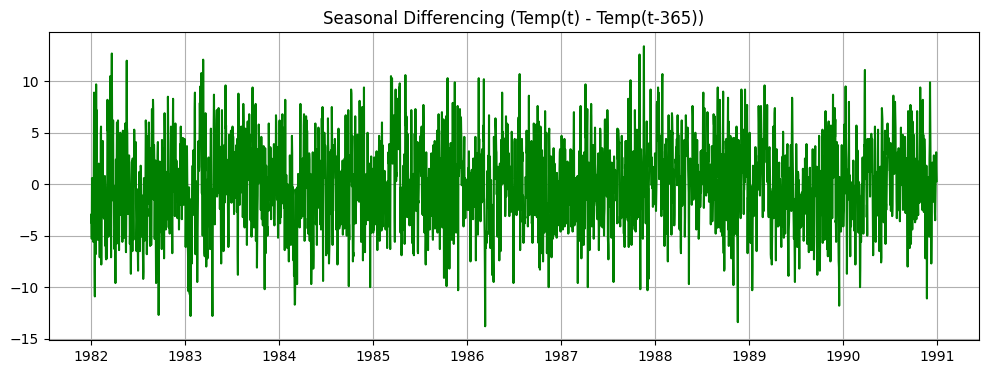

In [4]:
data["seasonal_diff"] = data["Temp"].diff(365)
seasonal_diff = data.dropna()

plt.figure(figsize=(12,4))
plt.plot(seasonal_diff["Date"], seasonal_diff["seasonal_diff"], color='green')
plt.title("Seasonal Differencing (Temp(t) - Temp(t-365))")
plt.grid(True)
plt.show()


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


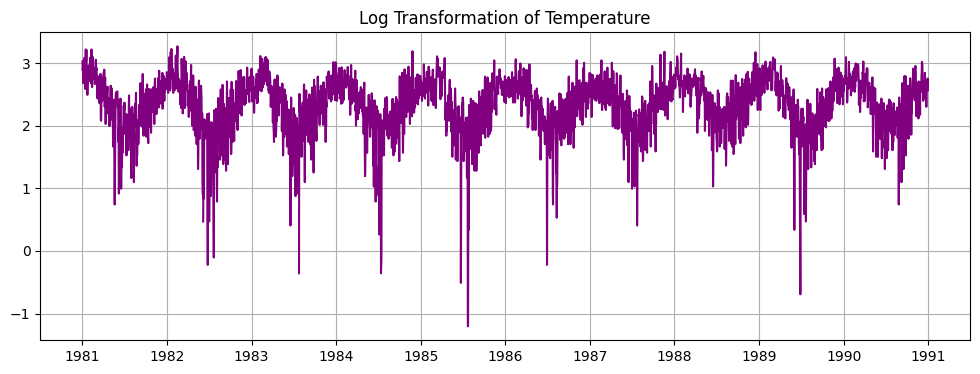

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Log Transformation
data["log_temp"] = np.log(data["Temp"])

plt.figure(figsize=(12,4))
plt.plot(data["Date"], data["log_temp"], color='purple')
plt.title("Log Transformation of Temperature")
plt.grid(True)
plt.show()


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


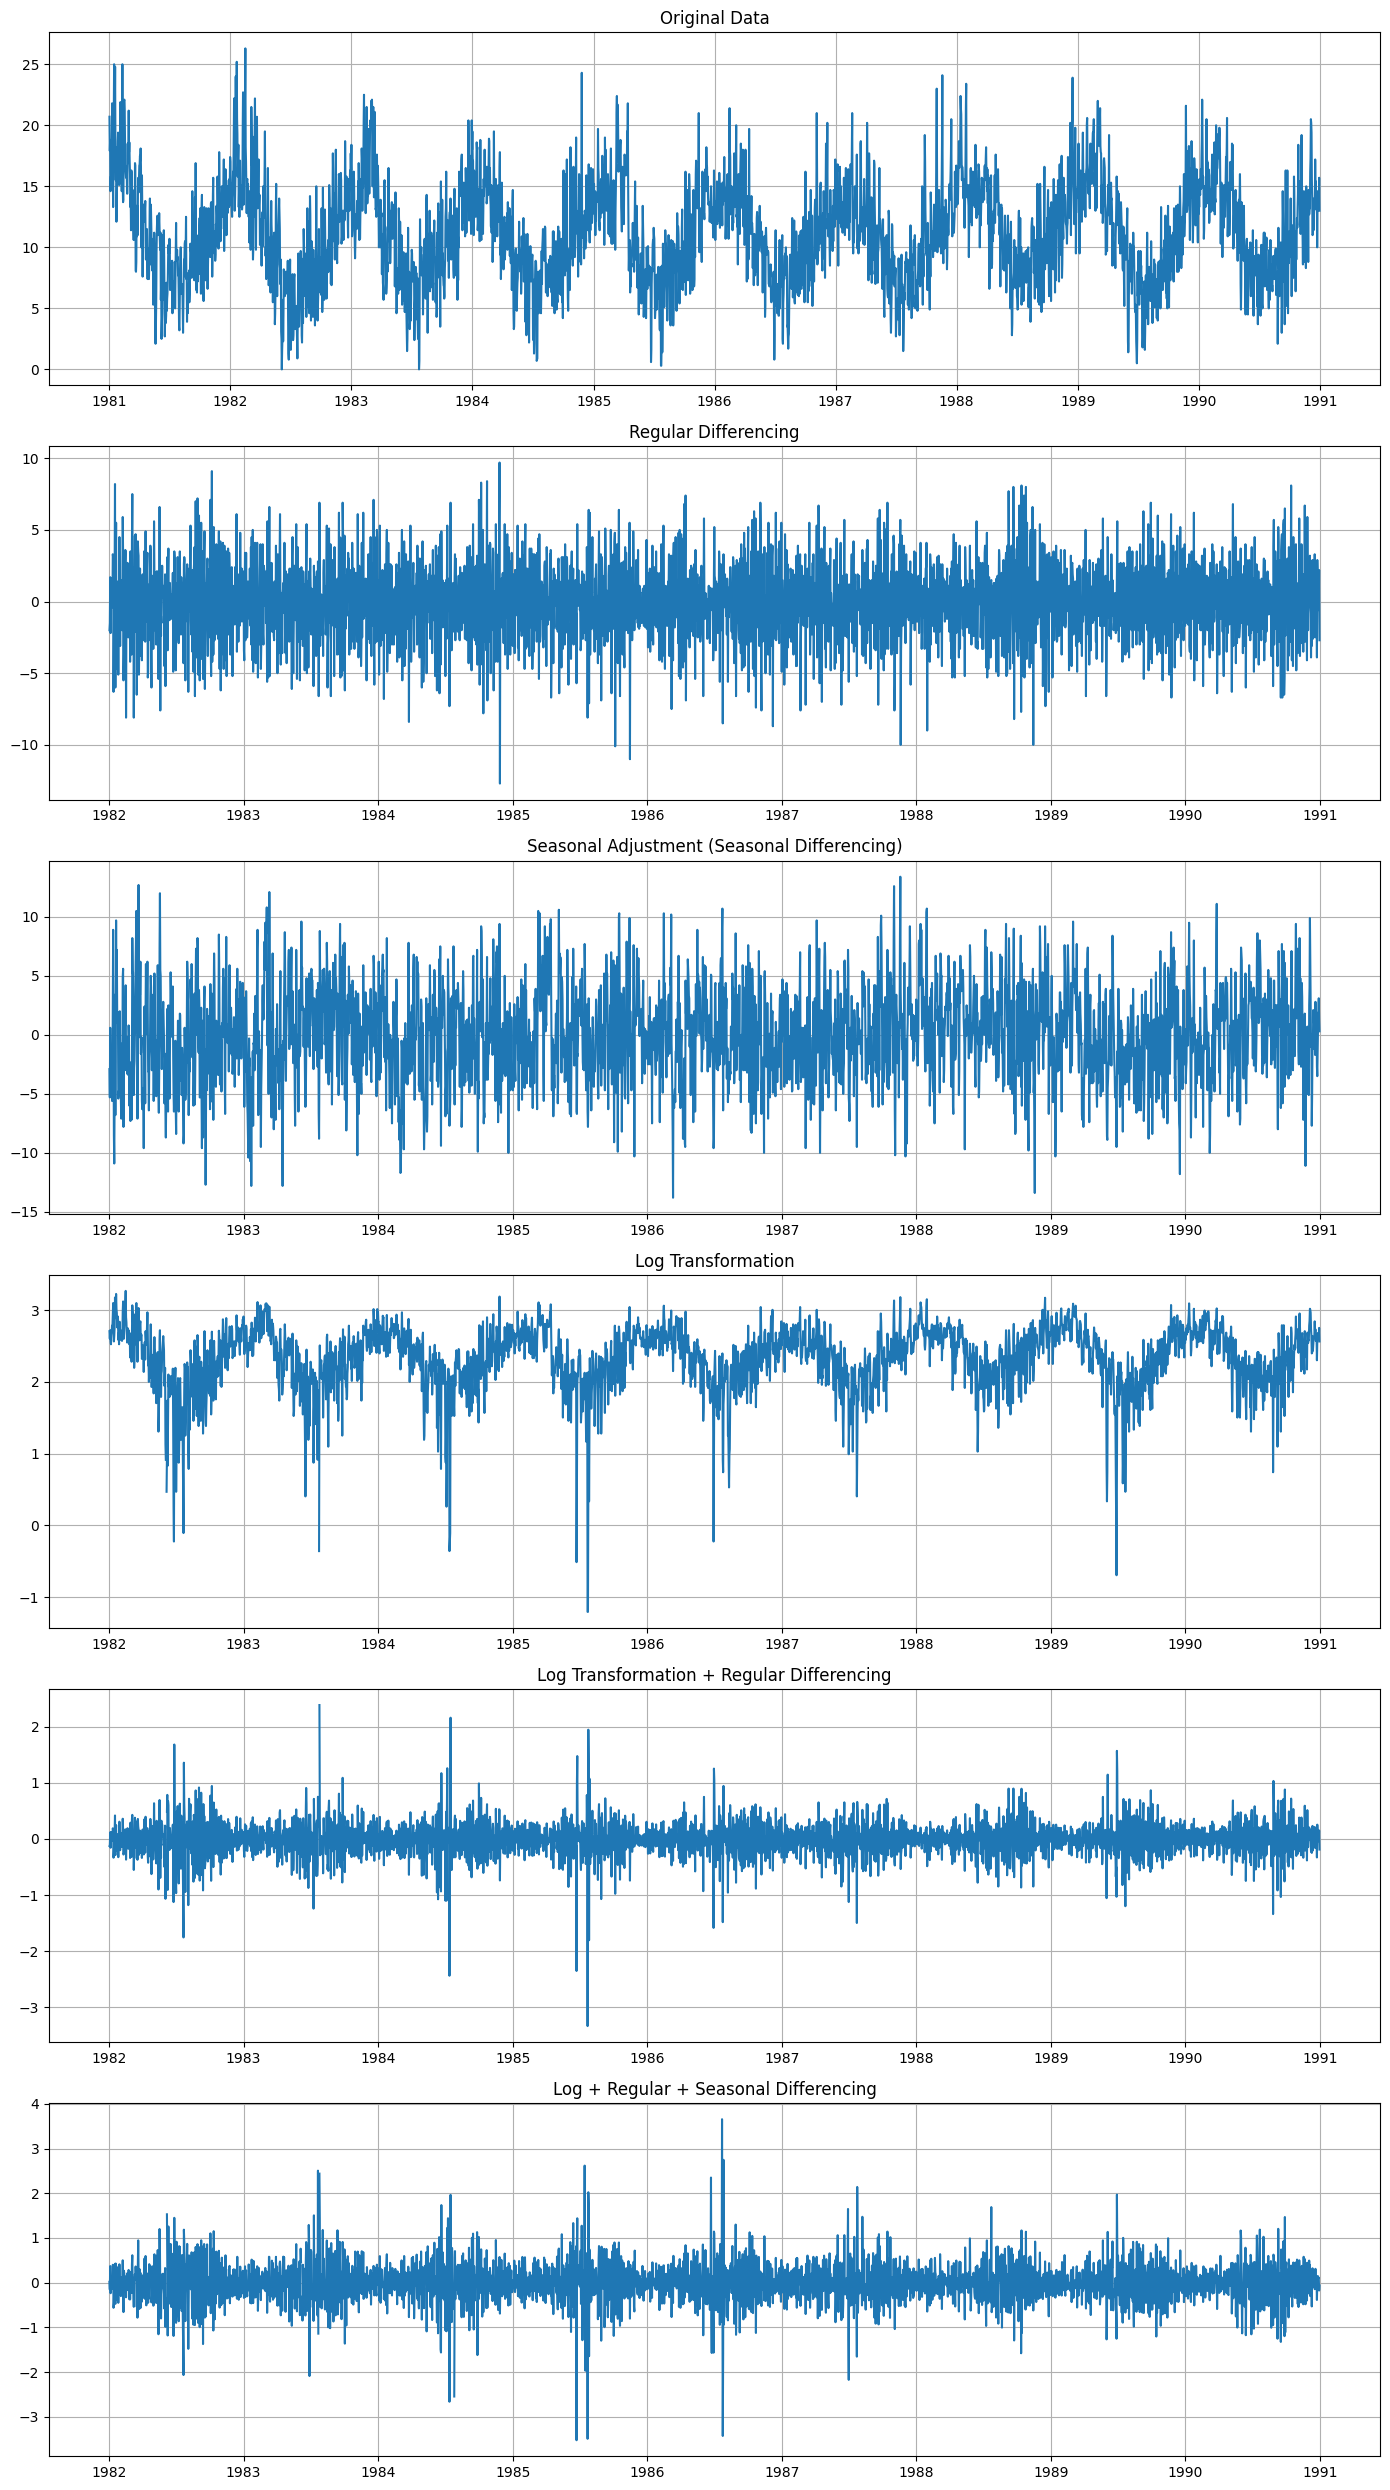

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("/kaggle/input/time-series/daily-minimum-temperatures-in-me.csv", on_bad_lines='skip')
data.columns = ["Date", "Temp"]
data["Date"] = pd.to_datetime(data["Date"])
data["Temp"] = pd.to_numeric(data["Temp"], errors="coerce")
data = data.dropna()

seasonal_period = 365

data["regular_diff"] = data["Temp"].diff()

data["seasonal_diff"] = data["Temp"].diff(seasonal_period)

data["log_temp"] = np.log(data["Temp"])


data["log_regular_diff"] = data["log_temp"].diff()


data["log_regular_seasonal_diff"] = data["log_temp"].diff().diff(seasonal_period)

data_clean = data.dropna()


plt.figure(figsize=(14, 25))


plt.subplot(6,1,1)
plt.plot(data["Date"], data["Temp"])
plt.title("Original Data")
plt.grid(True)


plt.subplot(6,1,2)
plt.plot(data_clean["Date"], data_clean["regular_diff"])
plt.title("Regular Differencing")
plt.grid(True)


plt.subplot(6,1,3)
plt.plot(data_clean["Date"], data_clean["seasonal_diff"])
plt.title("Seasonal Adjustment (Seasonal Differencing)")
plt.grid(True)


plt.subplot(6,1,4)
plt.plot(data_clean["Date"], data_clean["log_temp"])
plt.title("Log Transformation")
plt.grid(True)


plt.subplot(6,1,5)
plt.plot(data_clean["Date"], data_clean["log_regular_diff"])
plt.title("Log Transformation + Regular Differencing")
plt.grid(True)


plt.subplot(6,1,6)
plt.plot(data_clean["Date"], data_clean["log_regular_seasonal_diff"])
plt.title("Log + Regular + Seasonal Differencing")
plt.grid(True)

plt.tight_layout()
plt.show()


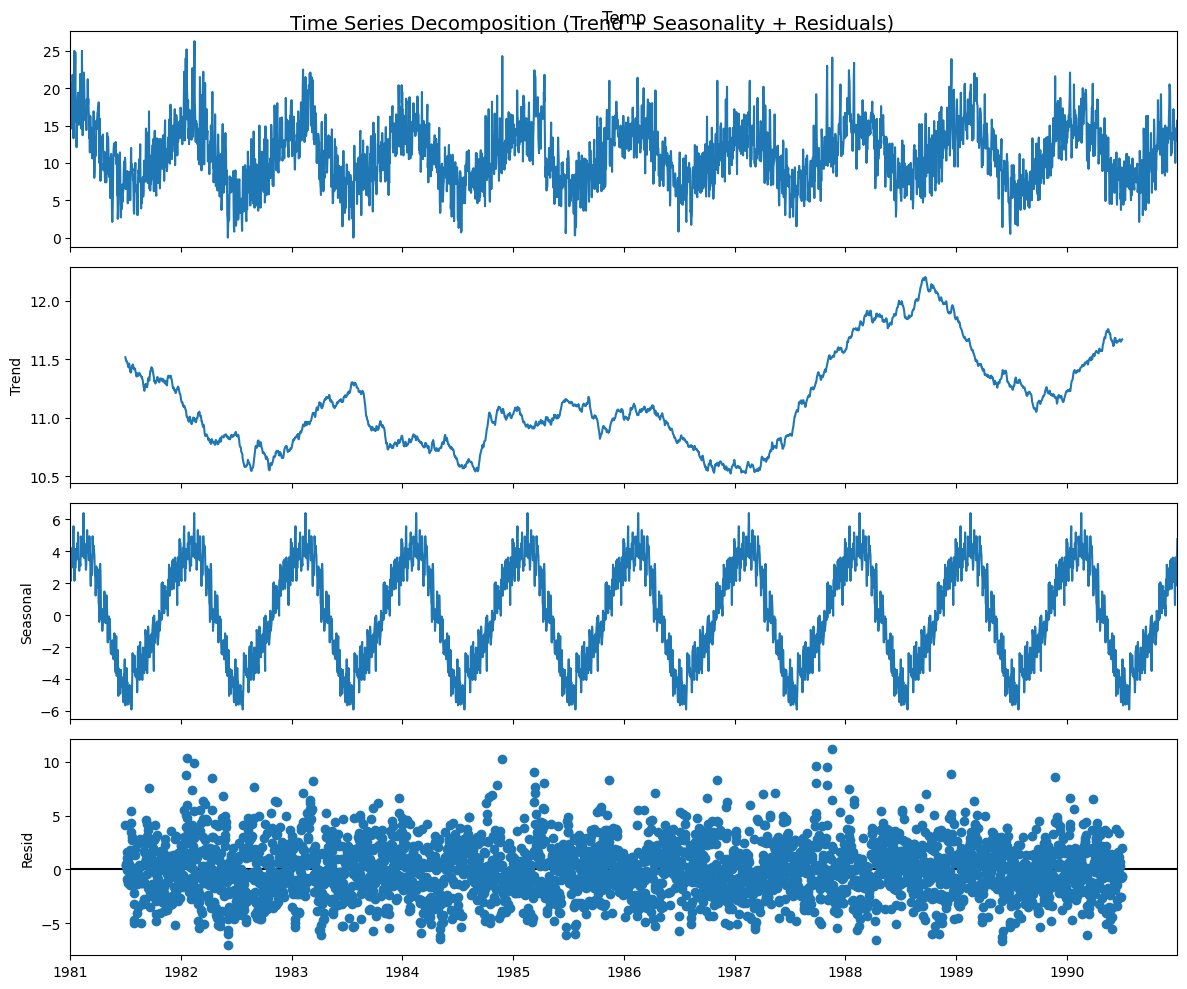

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv("/kaggle/input/time-series/daily-minimum-temperatures-in-me.csv", on_bad_lines='skip')
data.columns = ["Date", "Temp"]
data["Date"] = pd.to_datetime(data["Date"])
data["Temp"] = pd.to_numeric(data["Temp"], errors="coerce")
data = data.dropna()
data = data.set_index("Date")
decomposition = seasonal_decompose(data["Temp"], model="additive", period=365)

plt.rcParams["figure.figsize"] = (12, 10)
decomposition.plot()
plt.suptitle("Time Series Decomposition (Trend + Seasonality + Residuals)", fontsize=1)
plt.show()
